In [1]:
import numpy as np
import os.path as osp
import torch
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import CGConv
from random import shuffle, randint
import networkx as nx
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
import argparse
import pickle
from models import simpleNet, comp1Net, comp2Net
from util import get_loss, get_plot
from statistics import stdev

In [3]:
modelname = 'n000'
params = torch.load('./models/'+modelname+'.pth')

In [4]:
case = 'noname'
# nepoch = 10
mo = 'simple'
nconv = 1
datatype = 'data'
ytype = 'slab' # 3:slab, 4:space, 5:all
# lr = 0.001
save = 'no'

In [5]:
import pickle

with open('data.pickle', 'rb') as lb:
    rdata = pickle.load(lb)
    edge_indexes,features,surf_filters,ys_slab,ys_space,ys_all = rdata
    
allinone = []
for feature in features:
    for each in feature:
        allinone.append(each)
allinone = np.array(allinone)
scaler = StandardScaler().fit(allinone[:,:8])

In [6]:
with open(datatype+'.pickle', 'rb') as lb:
    rdata = pickle.load(lb)
    edge_indexes,features,surf_filters = rdata[:3]
    ys_slab,ys_space,ys_all = rdata[3:]

In [7]:
scfeatures = []

for feature in features:
    feature_sl = scaler.transform(feature[:,:8])
    feature_ad = feature[:,8:]
    scfeatures.append(np.concatenate((feature_sl, feature_ad), axis=1))
    
features = np.array(scfeatures)
# features

In [8]:
if ytype=='slab':
    ys = rdata[-3]
elif ytype=='space':
    ys = rdata[-2]
elif ytype=='all':
    ys = rdata[-1]

In [9]:
data_list = []
for i in range(len(ys_all)):
    edge_index = torch.tensor(edge_indexes[i], dtype=torch.long)
    x = torch.tensor(features[i], dtype=torch.float)
    surf_filter = torch.tensor(surf_filters[i], dtype=torch.long)
    y = torch.tensor(ys_slab[i], dtype=torch.float)
    data = Data(x=x, edge_index=edge_index, surf_filter=surf_filter, y=y)
    data_list.append(data)

In [10]:
in_ch = len(features[0][0])
in_ch_sl = 8
in_ch_ad = len(features[0][0]) - 8

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
import copy
data_list_ = copy.deepcopy(data_list) # all

In [13]:
if mo == 'simple':
    model = simpleNet(in_ch, nconv).to(device)
elif mo == 'comp1':
    model = comp1Net(in_ch_sl, in_ch_ad, nconv).to(device)
elif mo == 'comp2':
    model = comp2Net(in_ch_sl, in_ch_ad, nconv).to(device)

In [14]:
model.load_state_dict(params)

<All keys matched successfully>

In [15]:
model.eval()

simpleNet(
  (conv1): CGConv(11, dim=0)
  (conv2): CGConv(11, dim=0)
  (lin): Linear(in_features=11, out_features=1, bias=True)
)

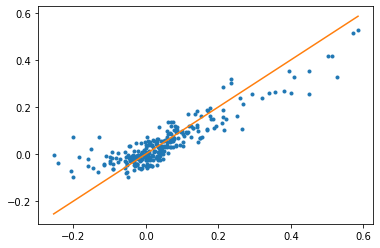

In [16]:
get_plot(model,data_list_)

In [17]:
allloss = get_loss(model,data_list)**0.5
allloss

tensor(0.0588, device='cuda:0', grad_fn=<PowBackward0>)

In [ ]:
def get_each_data(datatype):
    sepdata = []
    if datatype=='data' or datatype=='data_OH':
        sepdata.append(data_list[0:12])
        sepdata.append(data_list[12:26])
        sepdata.append(data_list[26:47])
        sepdata.append(data_list[47:65])
        sepdata.append(data_list[65:78])
        sepdata.append(data_list[78:99])
        sepdata.append(data_list[99:119])
        sepdata.append(data_list[119:136])
        sepdata.append(data_list[136:156])
        sepdata.append(data_list[156:170])
        sepdata.append(data_list[170:189])
        sepdata.append(data_list[189:203])
        sepdata.append(data_list[203:223])
        sepdata.append(data_list[223:242])
        sepdata.append(data_list[242:262])
        sepdata.append(data_list[262:])
    elif datatype=='data_100' or datatype=='data_OH_100':
        sepdata.append(data_list[0:12])
        sepdata.append(data_list[12:33])
        sepdata.append(data_list[33:46])
        sepdata.append(data_list[46:66])
        sepdata.append(data_list[66:86])
        sepdata.append(data_list[86:105])
        sepdata.append(data_list[105:125])
        sepdata.append(data_list[125:])
    elif datatype=='data_111' or datatype=='data_OH_111':
        sepdata.append(data_list[0:14])
        sepdata.append(data_list[14:32])
        sepdata.append(data_list[32:53])
        sepdata.append(data_list[53:70])
        sepdata.append(data_list[70:84])
        sepdata.append(data_list[84:98])
        sepdata.append(data_list[98:117])
        sepdata.append(data_list[117:])
    
    return sepdata

In [ ]:
sepdata = get_each_data(datatype)

In [ ]:
i=0
for data in sepdata:
    print(i)
    get_plot(model,data)
    i+=1